In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
sca_cc_d_python = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/scalability/python/2022-01-21-15-56_CCScalabilityD_python/CCScalabilityD_python.csv")
sca_cc_d_scala = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/scalability/scala/2022-01-21-15-19_CCScalabilityD_scala/CCScalabilityD_scala.csv")
sca_cc_d = sca_cc_d_python.append(sca_cc_d_scala)

sca_cc_o_python = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/scalability/python/2022-01-21-18-11_CCScalabilityO_python/CCScalabilityO_python.csv")
sca_cc_o_scala = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/scalability/scala/2022-01-21-15-20_CCScalabilityO_scala/CCScalabilityO_scala.csv")
sca_cc_o = sca_cc_o_python.append(sca_cc_o_scala)

sca_gc_d_python = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/scalability/python/2022-01-21-20-52_GC3ScalabilityD_python/GC3ScalabilityD_python.csv")
sca_gc_d_scala = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/scalability/scala/2022-01-21-15-22_GC3ScalabilityD_scala/GC3ScalabilityD_scala.csv")
sca_gc_d = sca_gc_d_python.append(sca_gc_d_scala)

sca_gc_o_python = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/scalability/python/2022-01-21-21-33_GC3ScalabilityO_python/GC3ScalabilityO_python.csv")
sca_gc_o_scala = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/scalability/scala/2022-01-21-15-23_GC3ScalabilityO_scala/GC3ScalabilityO_scala.csv")
sca_gc_o = sca_gc_o_python.append(sca_gc_o_scala)

In [6]:
sca_gc_o.head()

,measure,obs_num,avg_cpu_time
0,dHSIC,50,0.859906
1,dHSIC,100,2.120637
2,dHSIC,200,115.310844
3,dHSIC,300,691.343291
4,dHSIC,400,1550.840753


In [7]:
all_measures_cc = ["dHSIC", "dCor", "RDC", "GMCDE"]
fast_measures_cc = ["dCor", "RDC", "GMCDE"]
fastest_measures_cc = ["RDC", "GMCDE"]
all_measures_gc = ["dHSIC", "GMCDE"]
fast_measures_gc = ["GMCDE"]

In [8]:
measure_color_dict = {
    "HSIC": "green",
    "dCor": "blue",
    "RDC": "purple",
    "GMCDE": "red",
    "dHSIC": "green"
}

measure_marker_dict = {
    "HSIC": "s-",
    "dCor": "v-",
    "RDC": "^-",
    "GMCDE": "o-",
    "dHSIC": "s-"
}

In [17]:
def runtime_cc_o():
  data = sca_cc_o
  variable = "obs_num"
  f, axarr = plt.subplots(1,3, figsize = (20,4), sharex=False, sharey=False)
  f.suptitle(r"CPU time of different measures for 2 multivariate random variables against number of observations $n$", fontsize = 24, y= 1.1)
  axes = axarr.flatten()
  x = data[variable].unique()
  ylabel = "CPU time (ms)"
  ylabel_size = 22

  def sub(i, measures, loca):
    plt.sca(axes[i])
    for measure in measures:
      y = data[data["measure"] == measure]["avg_cpu_time"]
      plt.plot(x, y, measure_marker_dict[measure], color=measure_color_dict[measure] , label = measure)
      plt.legend(loc = loca,prop={"size":18})
      plt.xlabel(r"$n$", fontsize = 22)
      if i == 0:
        plt.ylabel(ylabel = ylabel, fontsize = ylabel_size)
      else:
        plt.ylabel("")
      plt.yticks(fontsize = 18)
      plt.xticks(range(0, 1205, 100), fontsize = 12)

  sub(0, all_measures_cc, "upper left")
  sub(1, fast_measures_cc, "upper left")
  sub(2, fastest_measures_cc, "center left")
  plt.tight_layout()
  plt.savefig("runtime_cc_o", bbox_inches='tight')

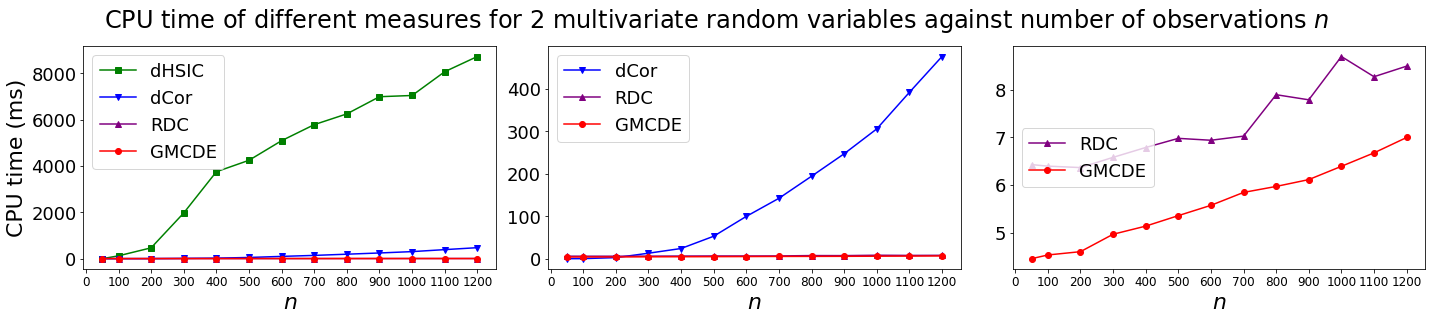

In [18]:
runtime_cc_o()

In [19]:
def runtime_cc_d():
  data = sca_cc_d
  variable = "dim"
  f, axarr = plt.subplots(1,3, figsize = (20,4), sharex=False, sharey=False)
  f.suptitle(r"CPU time of different measures for 2 multivariate random variables against number of dimensions $d$", fontsize = 24, y= 1.1)
  axes = axarr.flatten()
  x = data[variable].unique()
  ylabel = "CPU time (ms)"
  ylabel_size = 22

  def sub(i, measures, loca):
    plt.sca(axes[i])
    for measure in measures:
      y = data[data["measure"] == measure]["avg_cpu_time"]
      plt.plot(x, y, measure_marker_dict[measure], color=measure_color_dict[measure] , label = measure)
      plt.legend(loc = loca,prop={"size":18})
      plt.xlabel(r"$d$", fontsize = 22)
      if i == 0:
        plt.ylabel(ylabel = ylabel, fontsize = ylabel_size)
      else:
        plt.ylabel("")
      plt.yticks(fontsize = 18)
      plt.xticks(range(2, 15, 1), fontsize = 18)

  sub(0, all_measures_cc, "center right")
  sub(1, fast_measures_cc, "center right")
  sub(2, fastest_measures_cc, "center right")
  plt.tight_layout()
  plt.savefig("runtime_cc_d", bbox_inches='tight')

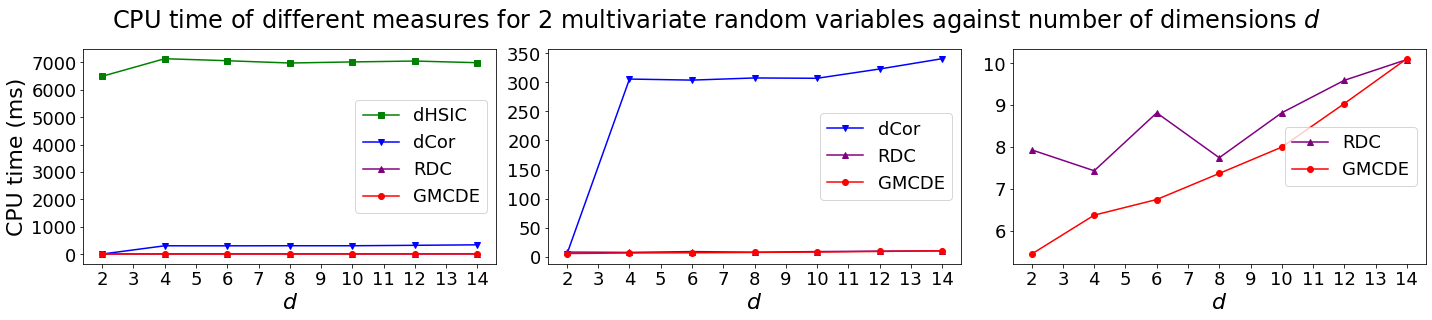

In [20]:
runtime_cc_d()

In [21]:
def runtime_gc_o():
  data = sca_gc_o
  variable = "obs_num"
  f, axarr = plt.subplots(1,2, figsize = (2 * 8,4), sharex=False, sharey=False)
  f.suptitle(r"CPU time of different measures for multiple multivariate random variables against number of observations $n$", fontsize = 20, y= 1.1)
  axes = axarr.flatten()
  x = data[variable].unique()
  ylabel = "CPU time (ms)"
  ylabel_size = 22

  def sub(i, measures, loca):
    plt.sca(axes[i])
    for measure in measures:
      y = data[data["measure"] == measure]["avg_cpu_time"]
      plt.plot(x, y, measure_marker_dict[measure], color=measure_color_dict[measure] , label = measure)
      plt.legend(loc = loca,prop={"size":18})
      plt.xlabel(r"$n$", fontsize = 22)
      if i == 0:
        plt.ylabel(ylabel = ylabel, fontsize = ylabel_size)
      else:
        plt.ylabel("")
      plt.yticks(fontsize = 18)
      plt.xticks(range(0, 1205, 100), fontsize = 14)

  sub(0, all_measures_gc, "upper left")
  sub(1, fast_measures_gc, "upper left")
  plt.tight_layout()
  plt.savefig("runtime_gc_o", bbox_inches='tight')

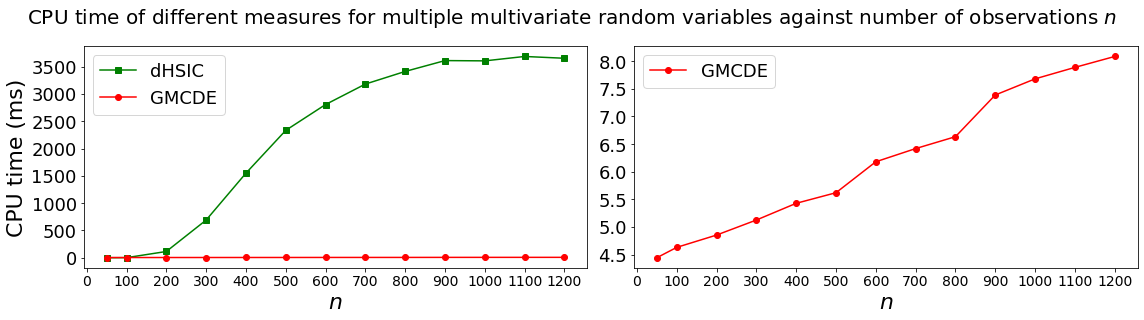

In [22]:
runtime_gc_o()

In [23]:
def runtime_gc_d():
  data = sca_gc_d
  variable = "dim"
  f, axarr = plt.subplots(1,2, figsize = (2 * 8,4), sharex=False, sharey=False)
  f.suptitle(r"CPU time of different measures for multiple multivariate random variables against number of dimensions $d$", fontsize = 20, y= 1.1)
  axes = axarr.flatten()
  x = data[variable].unique()
  ylabel = "CPU time (ms)"
  ylabel_size = 22

  def sub(i, measures, loca):
    plt.sca(axes[i])
    for measure in measures:
      y = data[data["measure"] == measure]["avg_cpu_time"]
      plt.plot(x, y, measure_marker_dict[measure], color=measure_color_dict[measure] , label = measure)
      plt.legend(loc = loca,prop={"size":18})
      plt.xlabel(r"$d$", fontsize = 22)
      if i == 0:
        plt.ylabel(ylabel = ylabel, fontsize = ylabel_size)
      else:
        plt.ylabel("")
      plt.yticks(fontsize = 18)
      plt.xticks(range(3,16, 1), fontsize = 16)

  sub(0, all_measures_gc, "center right")
  sub(1, fast_measures_gc, "upper left")
  plt.tight_layout()
  plt.savefig("runtime_gc_d", bbox_inches='tight')

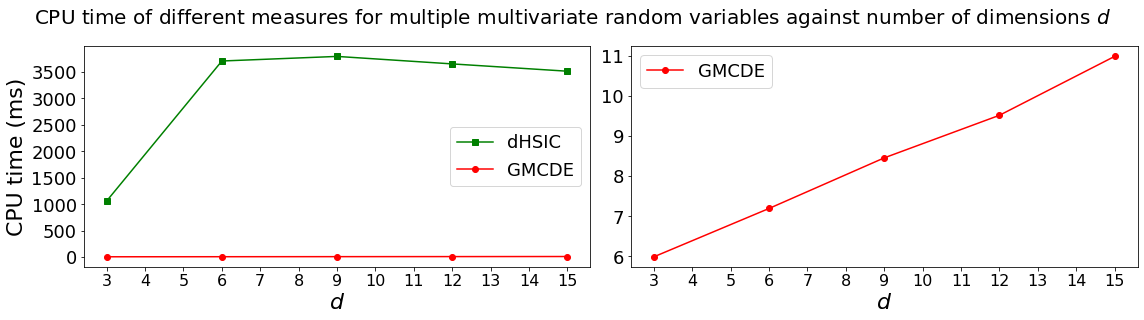

In [24]:
runtime_gc_d()